In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [52]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [54]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [55]:
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0) 
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,1


array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

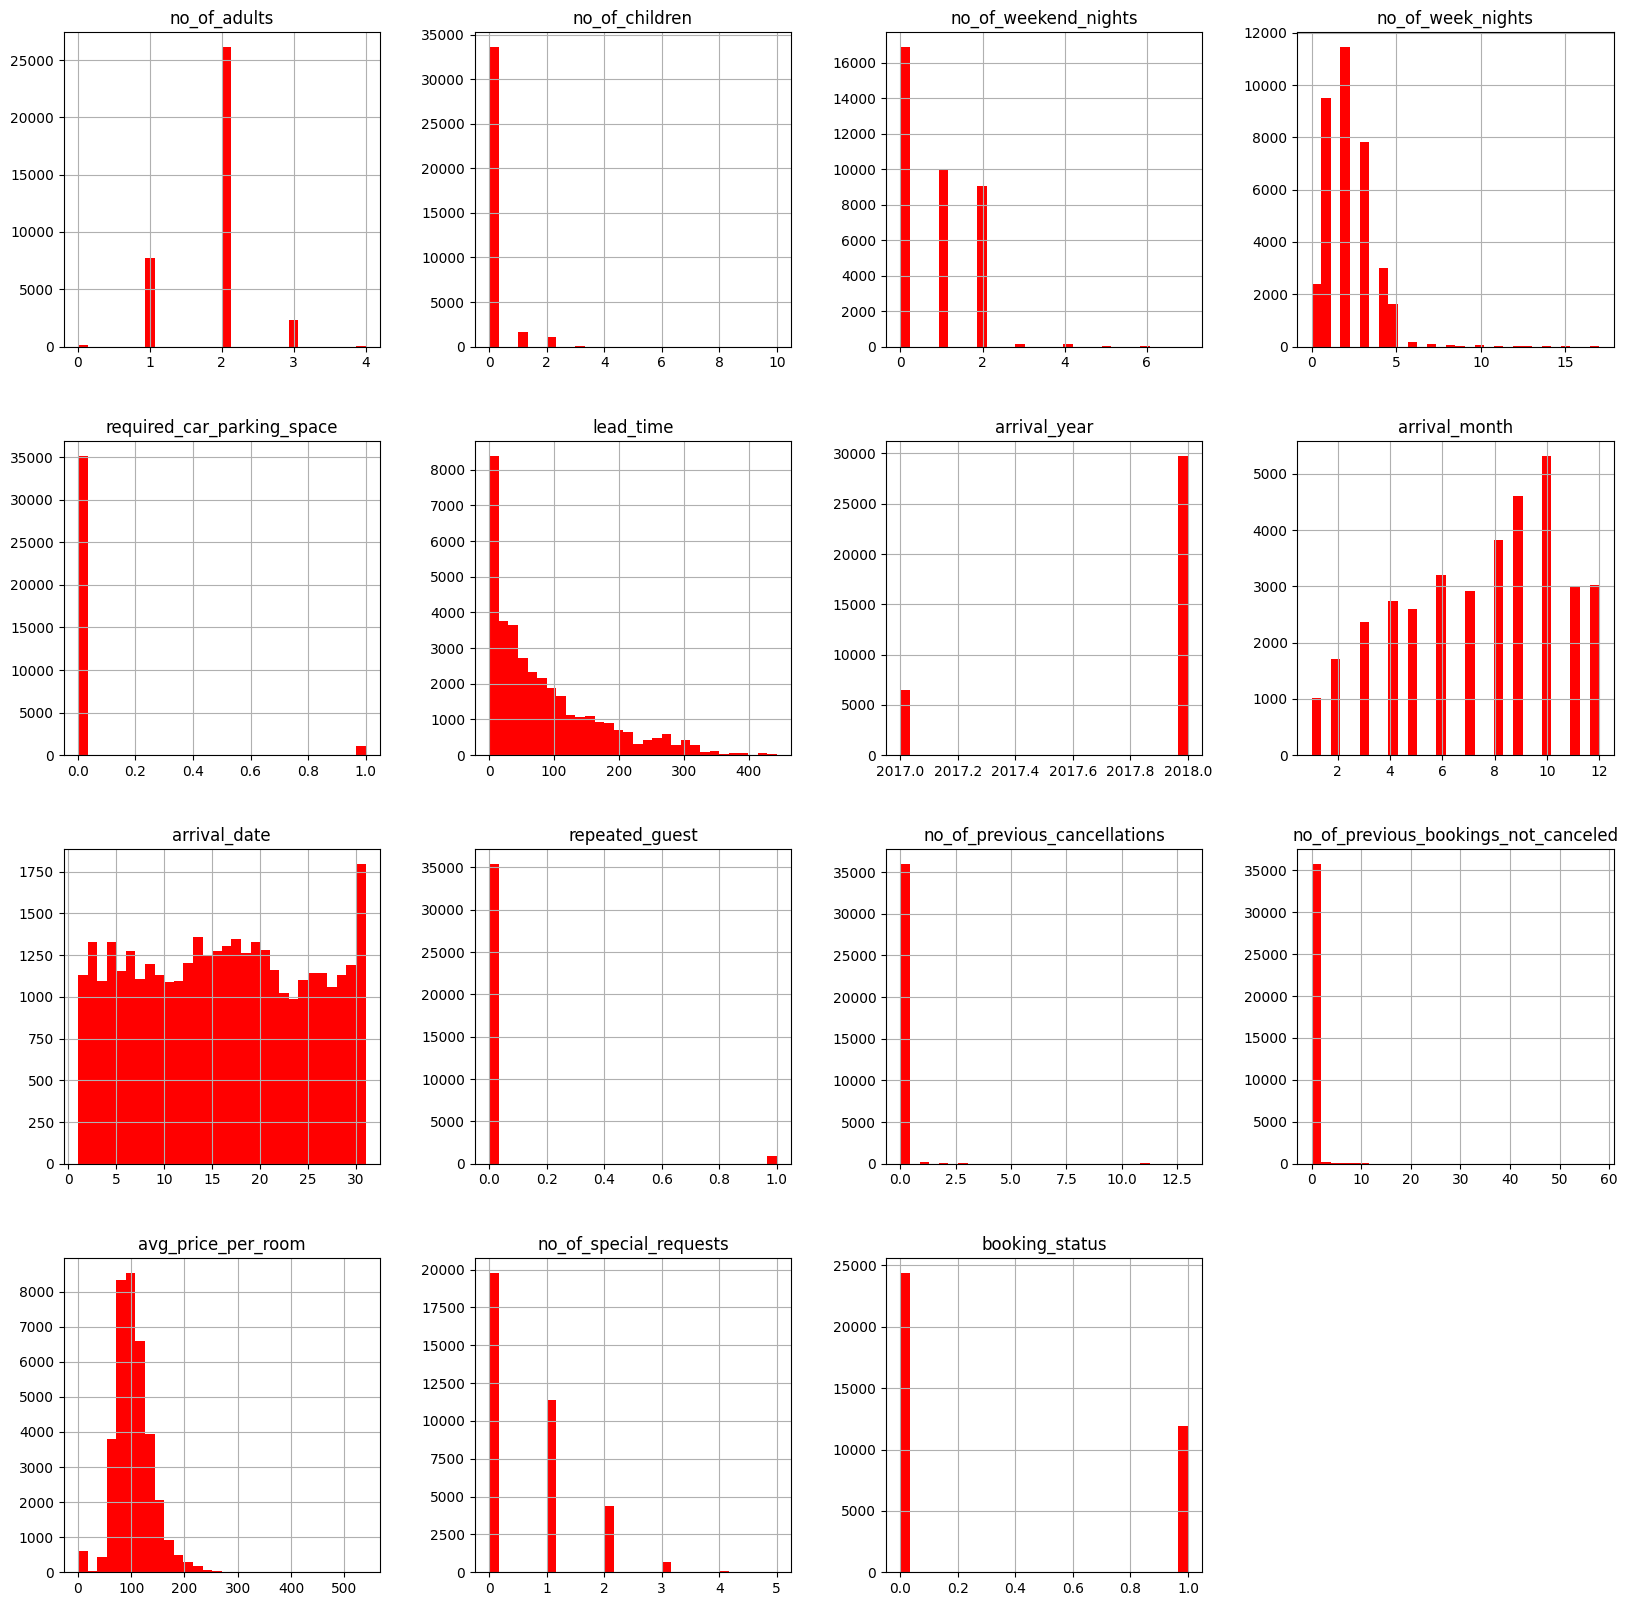

In [56]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [57]:
df = data['lead_time']
z_scores = (df - df.mean()) / df.std()
data['lead_time'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_adults']
z_scores = (df - df.mean()) / df.std()
data['no_of_adults'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_children']
z_scores = (df - df.mean()) / df.std()
data['no_of_children'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_week_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_week_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_weekend_nights']
z_scores = (df - df.mean()) / df.std()
data['no_of_weekend_nights'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_cancellations']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_cancellations'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_previous_bookings_not_canceled']
z_scores = (df - df.mean()) / df.std()
data['no_of_previous_bookings_not_canceled'] = df[(np.abs(z_scores) < 3)]

df = data['avg_price_per_room']
z_scores = (df - df.mean()) / df.std()
data['avg_price_per_room'] = df[(np.abs(z_scores) < 3)]

df = data['no_of_special_requests']
z_scores = (df - df.mean()) / df.std()
data['no_of_special_requests'] = df[(np.abs(z_scores) < 3)]


In [58]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0.0,0.0,65.00,0.0,0
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0.0,0.0,106.68,1.0,0
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0.0,0.0,60.00,0.0,1
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0.0,0.0,100.00,0.0,1
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,INN36271,3.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 4,85.0,2018,8,3,Online,0,0.0,0.0,167.80,1.0,0
33340,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0,Room_Type 1,228.0,2018,10,17,Online,0,0.0,0.0,90.95,2.0,1
33341,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0,Room_Type 1,148.0,2018,7,1,Online,0,0.0,0.0,98.39,2.0,0
33342,INN36274,2.0,0.0,0.0,3.0,Not Selected,0,Room_Type 1,63.0,2018,4,21,Online,0,0.0,0.0,94.50,0.0,1


<Axes: >

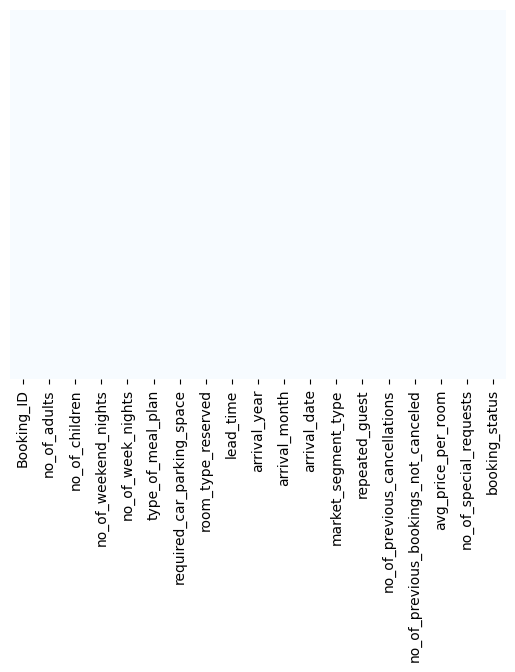

In [59]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'no_of_adults'}>,
        <Axes: title={'center': 'no_of_children'}>,
        <Axes: title={'center': 'no_of_weekend_nights'}>,
        <Axes: title={'center': 'no_of_week_nights'}>],
       [<Axes: title={'center': 'required_car_parking_space'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_year'}>,
        <Axes: title={'center': 'arrival_month'}>],
       [<Axes: title={'center': 'arrival_date'}>,
        <Axes: title={'center': 'repeated_guest'}>,
        <Axes: title={'center': 'no_of_previous_cancellations'}>,
        <Axes: title={'center': 'no_of_previous_bookings_not_canceled'}>],
       [<Axes: title={'center': 'avg_price_per_room'}>,
        <Axes: title={'center': 'no_of_special_requests'}>,
        <Axes: title={'center': 'booking_status'}>, <Axes: >]],
      dtype=object)

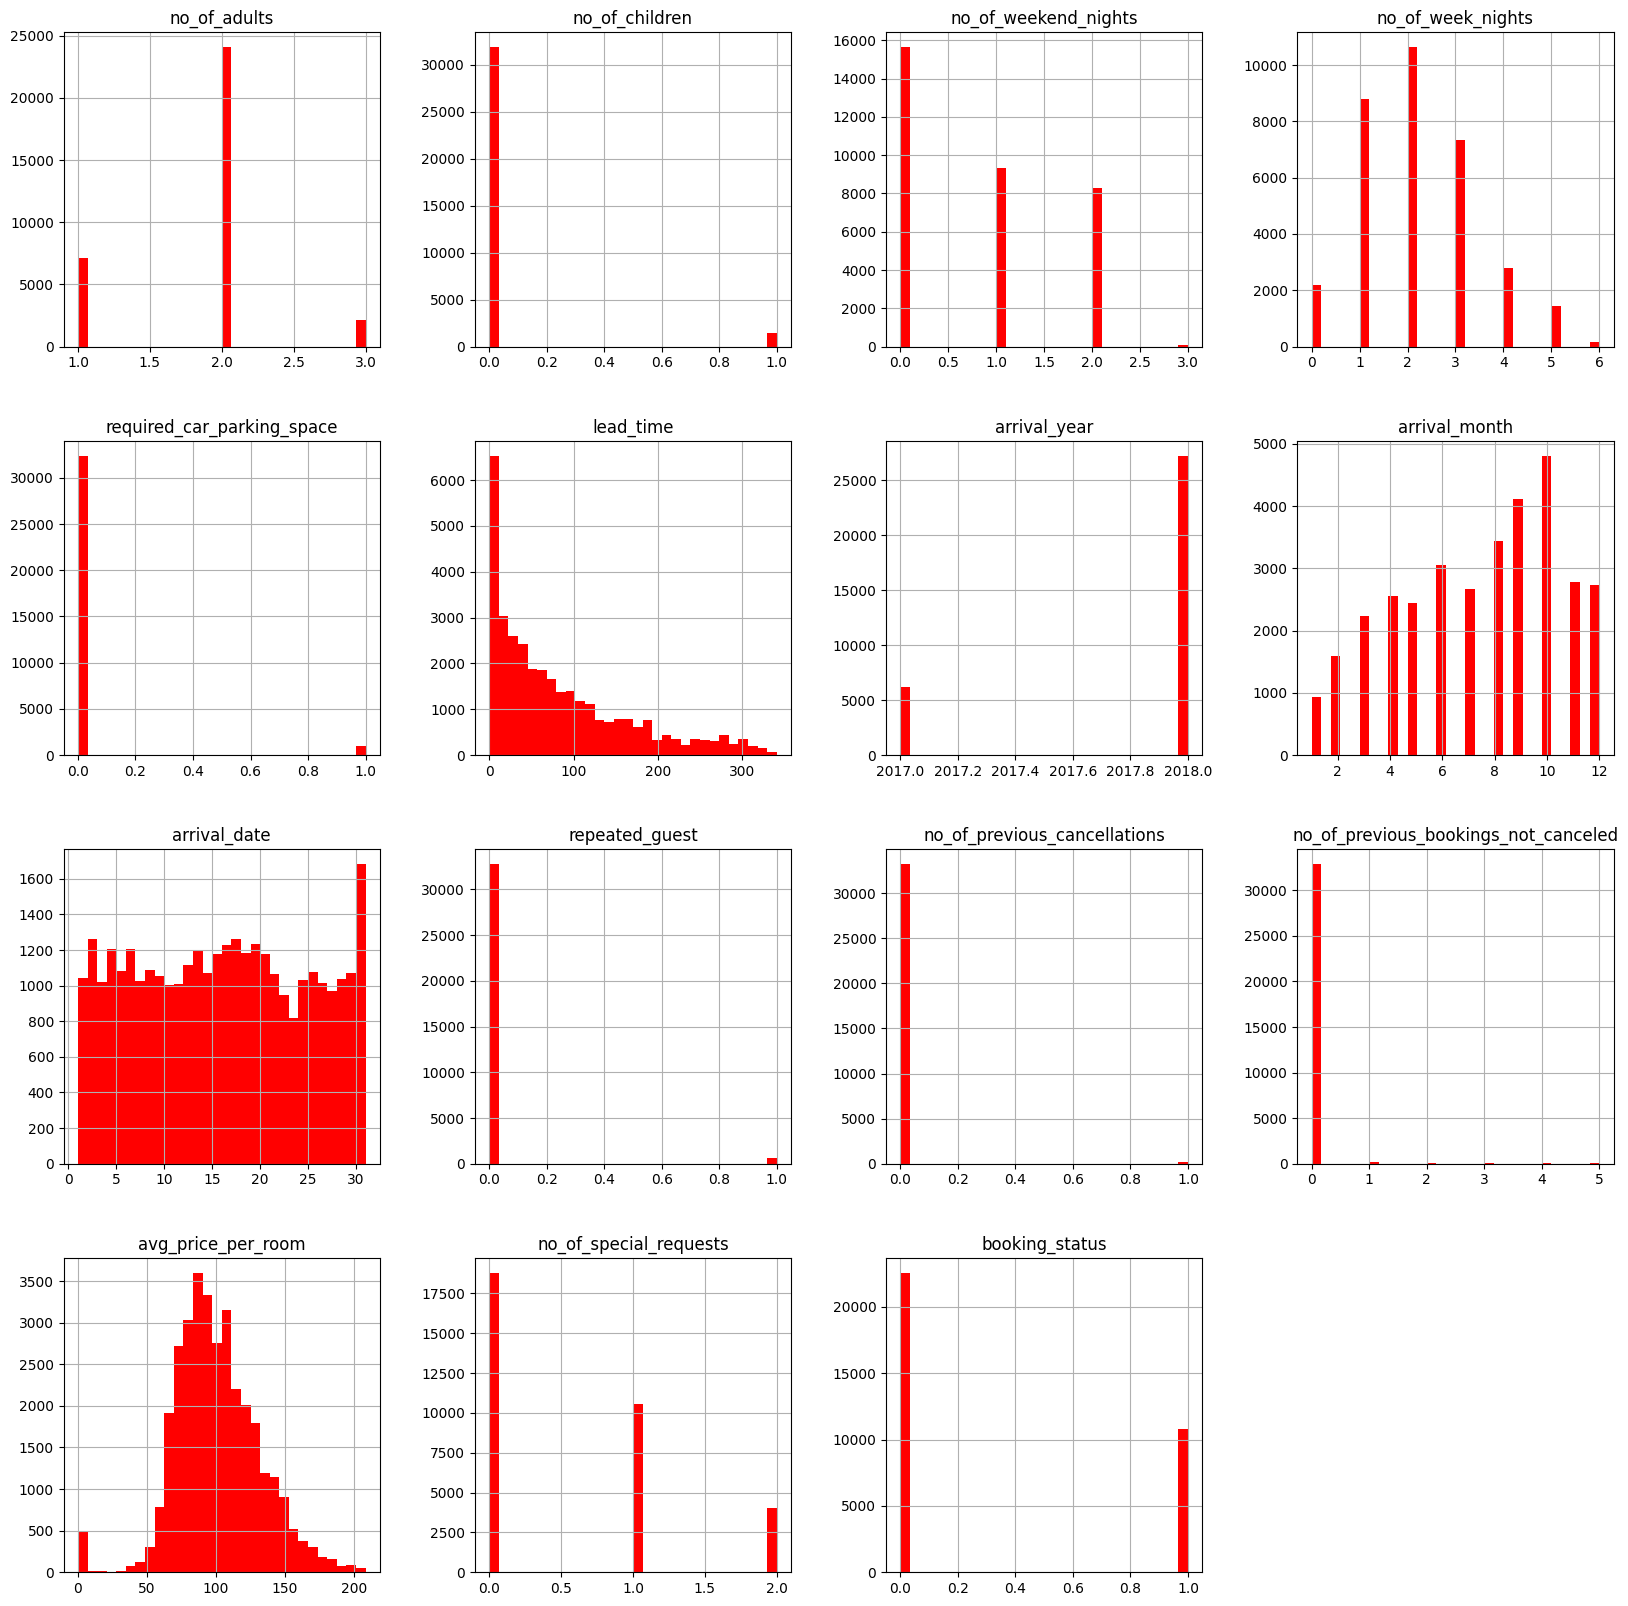

In [60]:
data.hist(bins = 30, figsize = (20,20), color = 'r')

In [61]:
data_int = data.select_dtypes(include=['int', 'float'])
data_int

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2.0,0.0,1.0,2.0,0,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,2.0,0.0,2.0,3.0,0,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,2.0,1.0,0,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,2.0,0.0,0.0,2.0,0,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,2.0,0.0,1.0,1.0,0,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,3.0,0.0,2.0,6.0,0,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,2.0,0.0,1.0,3.0,0,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,2.0,0.0,2.0,6.0,0,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,2.0,0.0,0.0,3.0,0,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


In [62]:
data_object = data.select_dtypes(include=['object'])
data_object = data_object.drop('Booking_ID', axis=1)
data_object

,type_of_meal_plan,room_type_reserved,market_segment_type
0,Meal Plan 1,Room_Type 1,Offline
1,Not Selected,Room_Type 1,Online
2,Meal Plan 1,Room_Type 1,Online
3,Meal Plan 1,Room_Type 1,Online
4,Not Selected,Room_Type 1,Online
...,...,...,...
33339,Meal Plan 1,Room_Type 4,Online
33340,Meal Plan 1,Room_Type 1,Online
33341,Meal Plan 1,Room_Type 1,Online
33342,Not Selected,Room_Type 1,Online


In [63]:
onehotencoder = OneHotEncoder()
data_object = onehotencoder.fit_transform(data_object).toarray()
data_object.shape

(33344, 16)

In [64]:
feature_names = onehotencoder.get_feature_names_out()

data_object_name = pd.DataFrame(data_object, columns=feature_names)
data_object_name

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
data_all = pd.concat([data_object_name, data_int], axis = 1)
data_all

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,224.0,2017,10,2,0,0.0,0.0,65.00,0.0,0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2018,11,6,0,0.0,0.0,106.68,1.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2018,2,28,0,0.0,0.0,60.00,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,211.0,2018,5,20,0,0.0,0.0,100.00,0.0,1
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,48.0,2018,4,11,0,0.0,0.0,94.50,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33339,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,85.0,2018,8,3,0,0.0,0.0,167.80,1.0,0
33340,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,228.0,2018,10,17,0,0.0,0.0,90.95,2.0,1
33341,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,148.0,2018,7,1,0,0.0,0.0,98.39,2.0,0
33342,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,63.0,2018,4,21,0,0.0,0.0,94.50,0.0,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

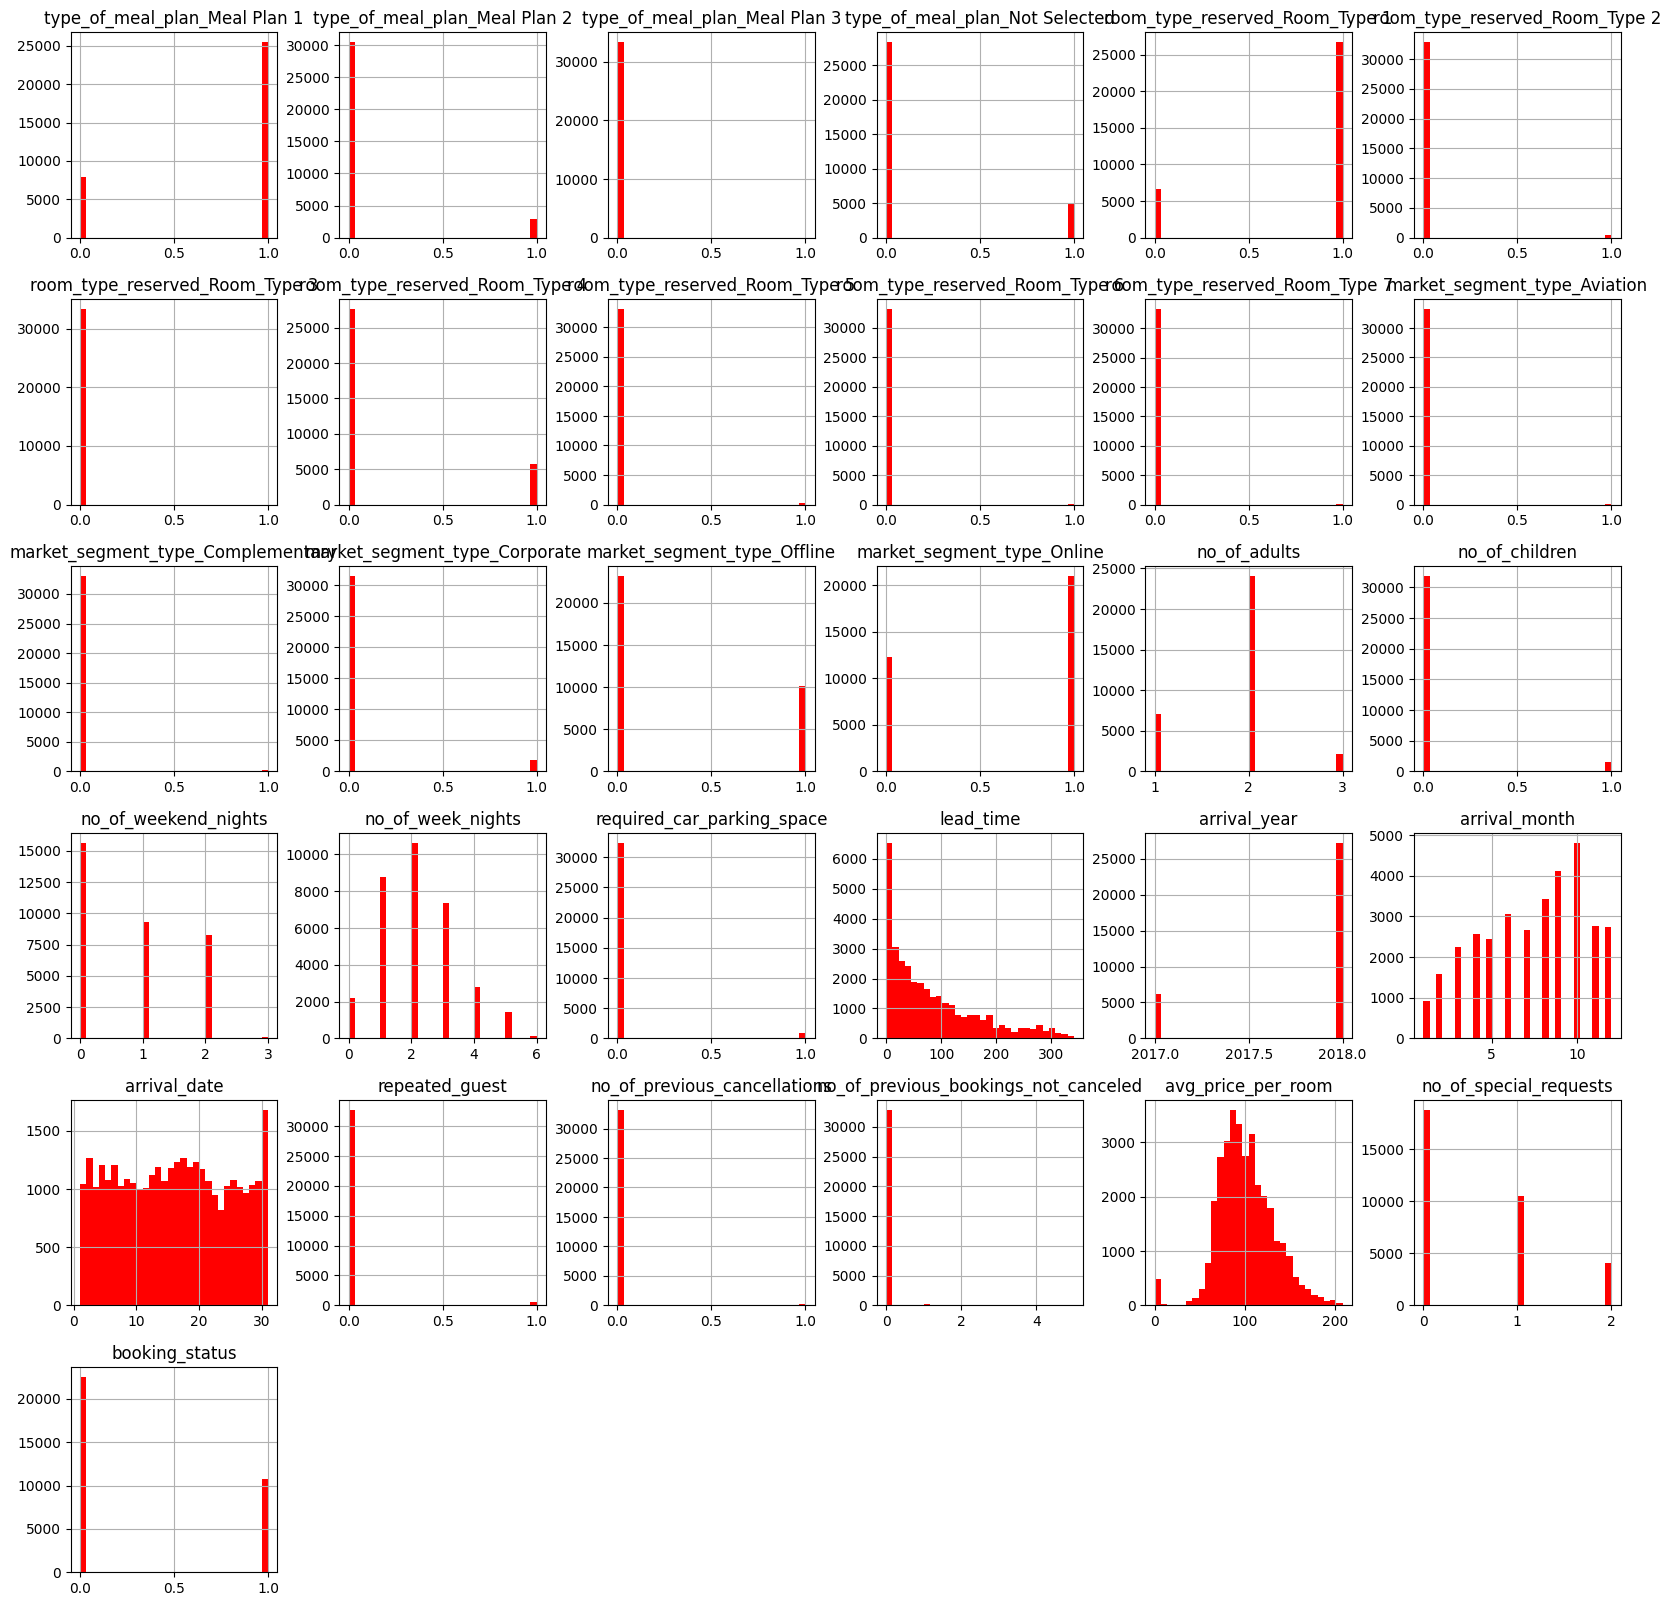

In [66]:
data_all.hist(bins = 30, figsize = (20,20), color = 'r')

In [67]:
X = data_all.drop('booking_status', axis=1)
y = data_all['booking_status']

In [68]:
# create a SMOTE object
smote = SMOTE()

# fit the SMOTE object to the data and oversample
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# combine the oversampled data into a new DataFrame
df_oversampled = pd.concat([pd.DataFrame(X_oversampled), pd.DataFrame(y_oversampled)], axis=1)
df_oversampled

,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,...,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1.00000,0.0,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,224.000000,2017,10,2,0,0.0,0.0,65.000000,0.000000,0
1,0.00000,0.0,0.0,1.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,5.000000,2018,11,6,0,0.0,0.0,106.680000,1.000000,0
2,1.00000,0.0,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,1.000000,2018,2,28,0,0.0,0.0,60.000000,0.000000,1
3,1.00000,0.0,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,211.000000,2018,5,20,0,0.0,0.0,100.000000,0.000000,1
4,0.00000,0.0,0.0,1.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,48.000000,2018,4,11,0,0.0,0.0,94.500000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45089,1.00000,0.0,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.0,...,3.475719,2018,3,6,0,0.0,0.0,101.000000,0.000000,1
45090,1.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,1.000000,0.0,0.0,...,139.414606,2018,6,30,0,0.0,0.0,113.390917,0.207303,1
45091,0.64646,0.0,0.0,0.35354,0.353540,0.0,0.0,0.646460,0.0,0.0,...,95.000000,2018,6,4,0,0.0,0.0,104.636988,0.646460,1
45092,0.69807,0.0,0.0,0.30193,1.000000,0.0,0.0,0.000000,0.0,0.0,...,22.000000,2018,6,21,0,0.0,0.0,128.071566,0.000000,1


array([[<Axes: title={'center': 'type_of_meal_plan_Meal Plan 1'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 2'}>,
        <Axes: title={'center': 'type_of_meal_plan_Meal Plan 3'}>,
        <Axes: title={'center': 'type_of_meal_plan_Not Selected'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 1'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 2'}>],
       [<Axes: title={'center': 'room_type_reserved_Room_Type 3'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 4'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 5'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 6'}>,
        <Axes: title={'center': 'room_type_reserved_Room_Type 7'}>,
        <Axes: title={'center': 'market_segment_type_Aviation'}>],
       [<Axes: title={'center': 'market_segment_type_Complementary'}>,
        <Axes: title={'center': 'market_segment_type_Corporate'}>,
        <Axes: title={'center': 'market_segment_t

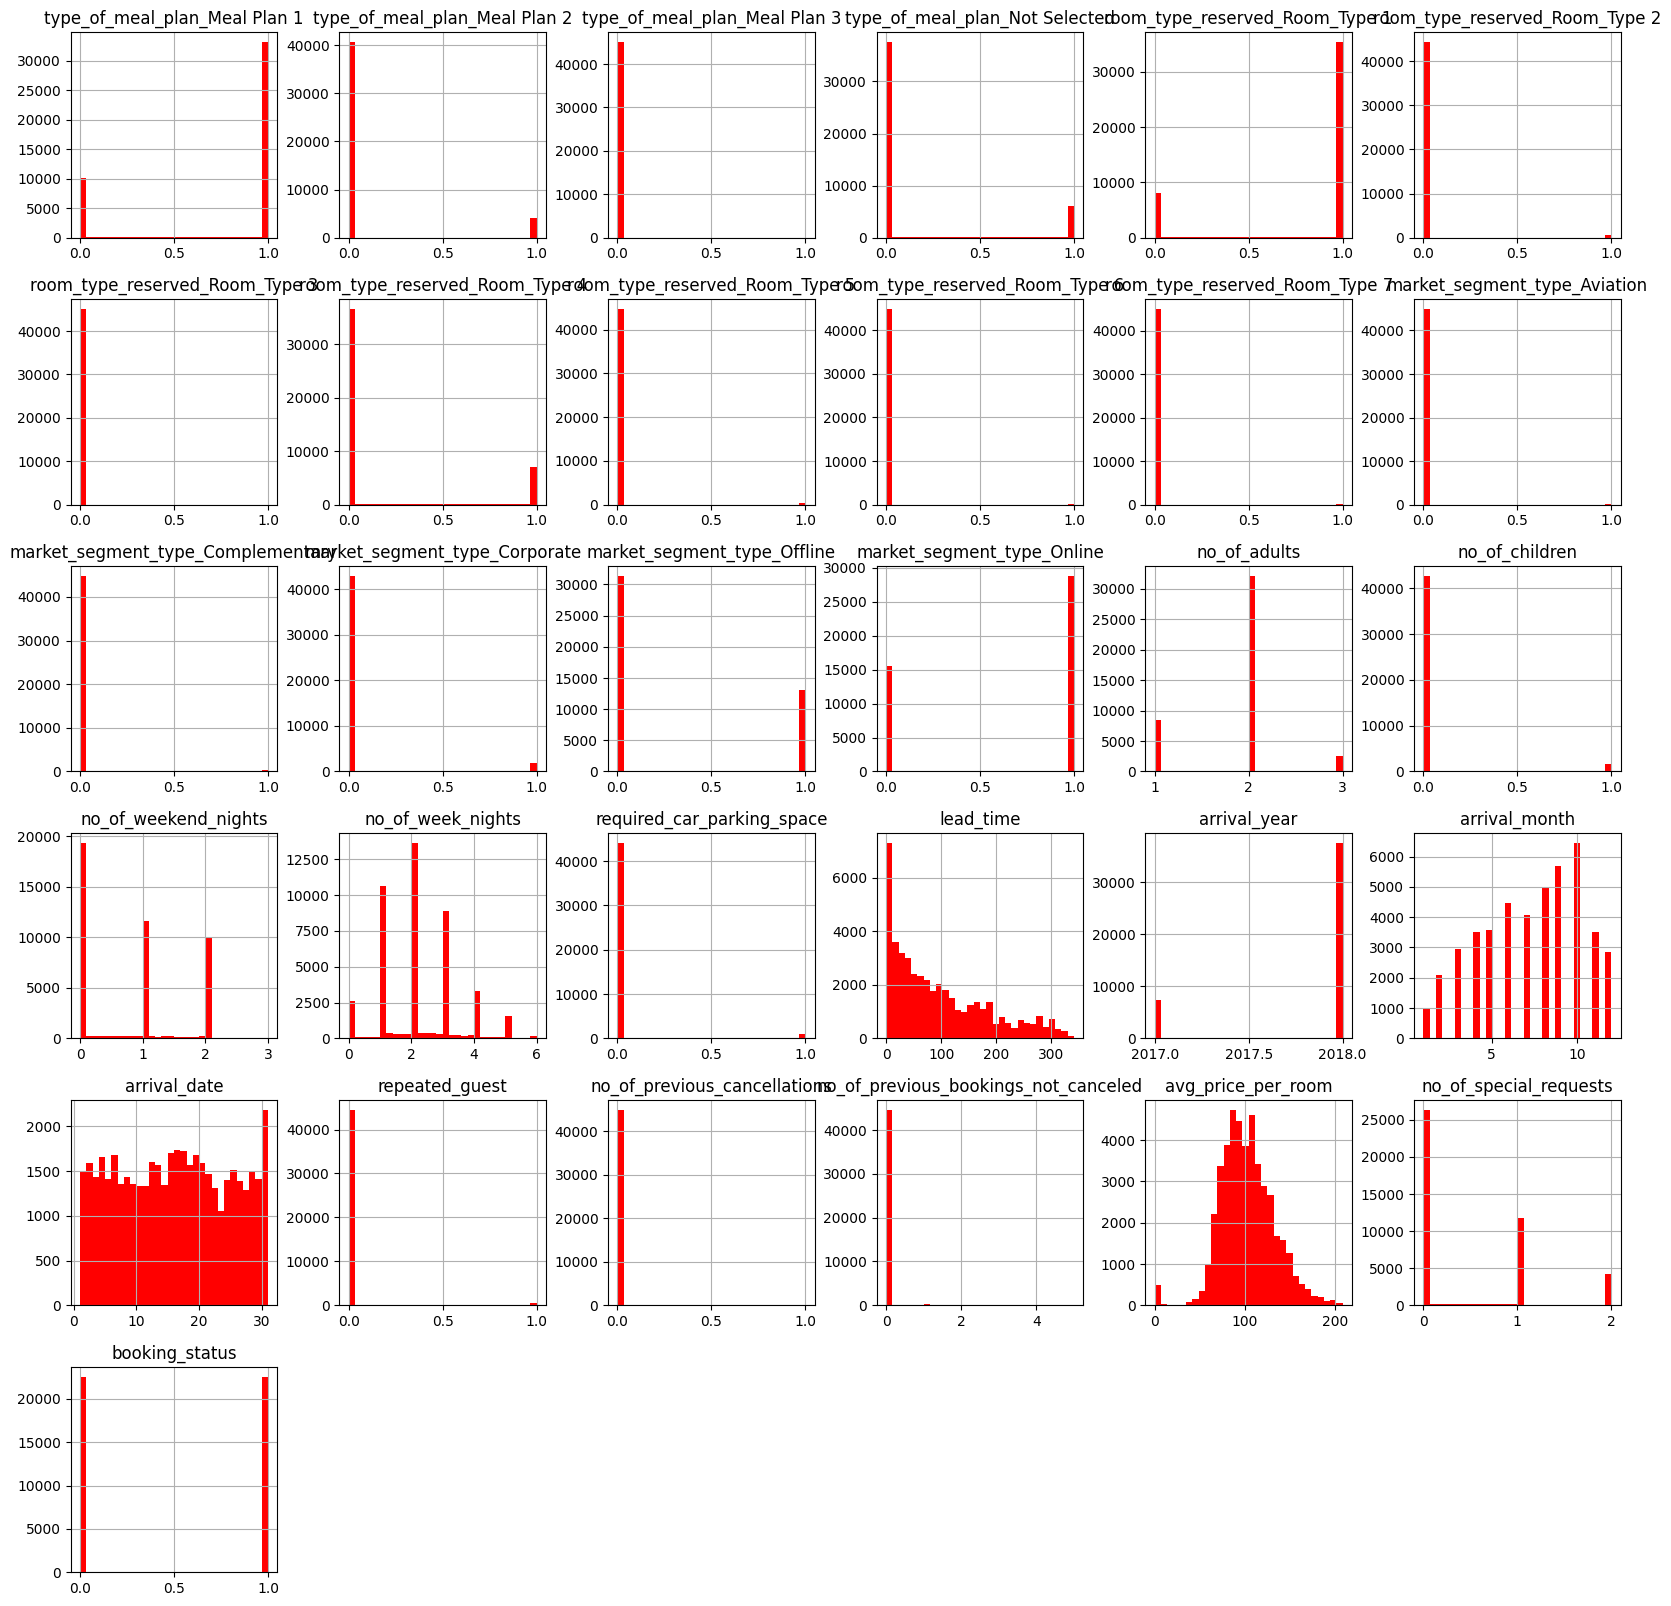

In [69]:
df_oversampled.hist(bins = 30, figsize = (20,20), color = 'r')

In [70]:
X = df_oversampled.drop('booking_status', axis=1)
y = df_oversampled['booking_status']

In [71]:
# Normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled

array([[ 0.57897795, -0.32392523, -0.01053052, ..., -0.09016007,
        -1.26719528, -0.74315831],
       [-1.79877674, -0.32392523, -0.01053052, ..., -0.09016007,
         0.13534374,  0.7676825 ],
       [ 0.57897795, -0.32392523, -0.01053052, ..., -0.09016007,
        -1.43544612, -0.74315831],
       ...,
       [-0.26165409, -0.32392523, -0.01053052, ..., -0.09016007,
         0.06659606,  0.23353943],
       [-0.1389366 , -0.32392523, -0.01053052, ..., -0.09016007,
         0.85517356, -0.74315831],
       [ 0.57897795, -0.32392523, -0.01053052, ..., -0.09016007,
         0.74895941,  1.03724419]])

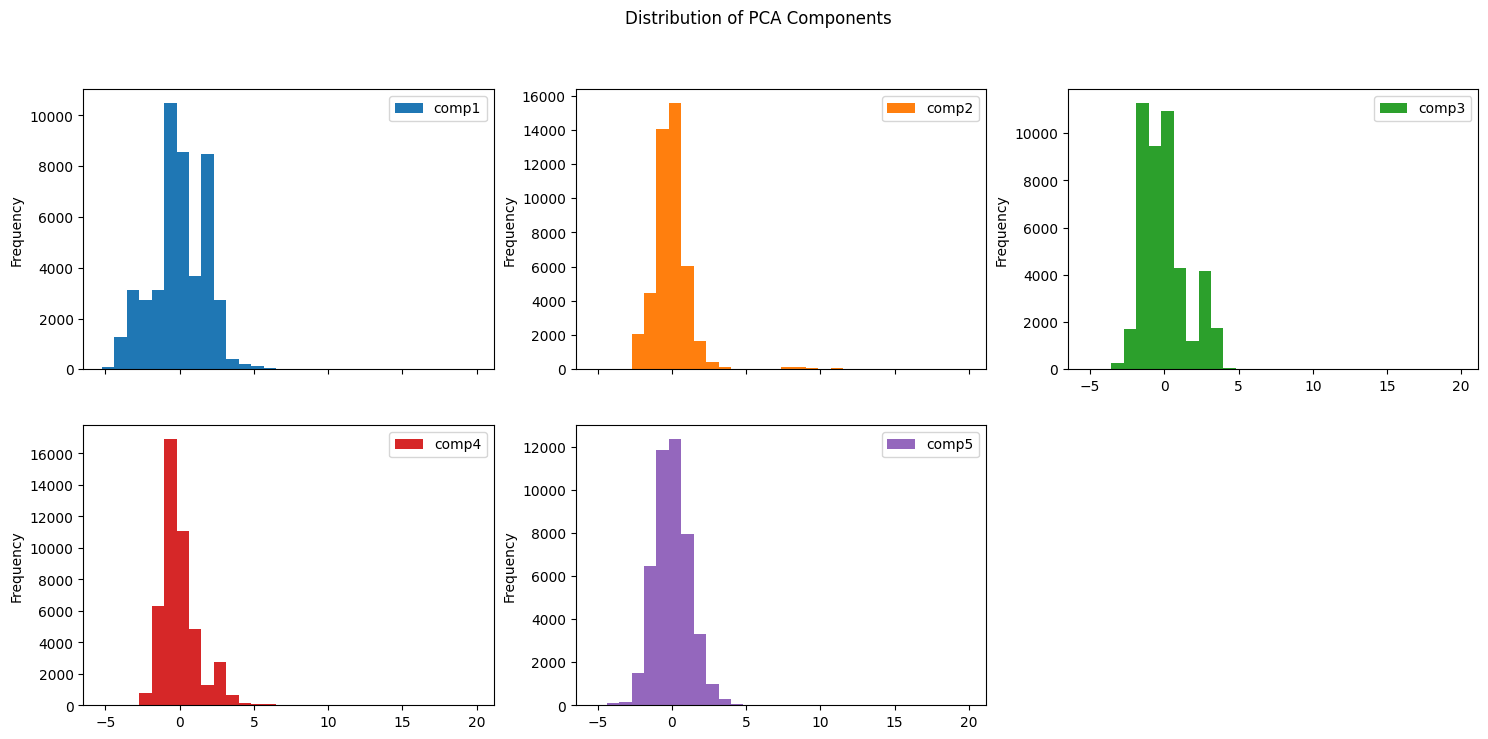

In [72]:
# PCA
pca = PCA(n_components=5, random_state=0)
data_pca = pd.DataFrame(pca.fit_transform(scaled), columns=['comp' + str(i) for i in range(1, 6)])
data_pca.plot(kind='hist', bins=30, figsize=(18, 8), subplots=True, layout=(2, 3),
                   title='Distribution of PCA Components')

pca.explained_variance_ratio_

# Add components to FMT data
X = pd.concat([X, data_pca], axis=1)

/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

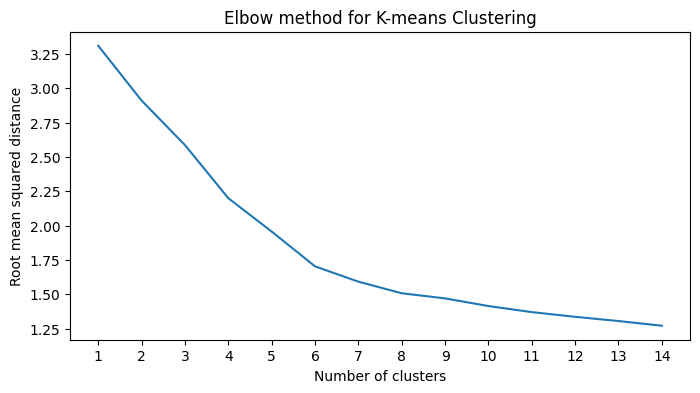

In [73]:
# Test different numbers of clusters
msd = [] # mean
for k in range(1, 15):
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(data_pca)
    msd.append(np.sqrt(kmeans.inertia_ / data_pca.shape[0]))
    
# Elbow method
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 15), y=msd)
plt.title('Elbow method for K-means Clustering')
plt.ylabel('Root mean squared distance')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 15), range(1, 15));

In [74]:
# K-means clustering
kmeans = KMeans(6)
kmeans.fit(data_pca)
X['cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [data_pca.columns])
cluster_centers    


/Users/sirawitwattano/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,comp1,comp2,comp3,comp4,comp5
0,-2.808428,0.784559,-1.184812,0.708653,-0.526196
1,-0.481056,0.110500,0.289227,-0.789322,0.641845
2,2.016126,-1.915812,-0.529617,2.684035,-0.419457
3,-0.146842,-0.985381,2.756686,0.333059,-0.309487
4,4.507163,10.248529,2.028618,3.587714,0.531549
5,1.717378,-0.000058,-1.173360,-0.724747,-0.171592


In [75]:
def segment_means(fmt_df, cols, group_col, count_col):
    
    df = fmt_df.groupby(group_col).mean()[cols].round(2)
    df['n_users'] = fmt_df.groupby(group_col)[count_col].count()
    df['pct_users'] = (100 * df.n_users / fmt_df.shape[0]).round(2)
    return df

In [76]:
# Cluster summary
feats = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','required_car_parking_space', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5']
cluster_means = segment_means(X, feats, 'cluster', 'cluster')
cluster_means

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,required_car_parking_space,comp1,comp2,comp3,comp4,comp5,n_users,pct_users
cluster,,,,,,,,,,,,,,,,
0,2.24,0.04,0.91,2.47,77.36,131.94,0.00,0.00,0.03,-2.81,0.78,-1.18,0.71,-0.53,7749,17.18
1,1.85,0.09,0.88,2.25,91.84,102.73,0.00,0.00,0.03,-0.48,0.11,0.29,-0.79,0.64,14666,32.52
2,1.87,0.01,0.63,1.87,164.02,107.08,0.00,0.00,0.00,2.02,-1.92,-0.53,2.68,-0.42,3691,8.19
3,1.88,0.03,0.78,1.90,65.72,96.55,0.00,0.00,0.02,-0.15,-0.99,2.76,0.33,-0.31,6930,15.37
4,1.25,0.01,0.45,1.34,10.77,69.59,0.26,1.83,0.16,4.51,10.25,2.03,3.59,0.53,605,1.34
5,1.66,0.01,0.70,2.13,117.40,86.77,0.00,0.00,0.01,1.72,-0.00,-1.17,-0.72,-0.17,11453,25.40


In [77]:
def heatmap(data, title, ylabel, xlabel='Feature', vmin=-1, vmax=1, cmap='RdBu'):
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(data, annot=True, vmin=vmin, vmax=vmax, cmap=cmap, fmt='.3f')
    plt.title(title, fontsize='x-large')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks(rotation=0)
    plt.show()

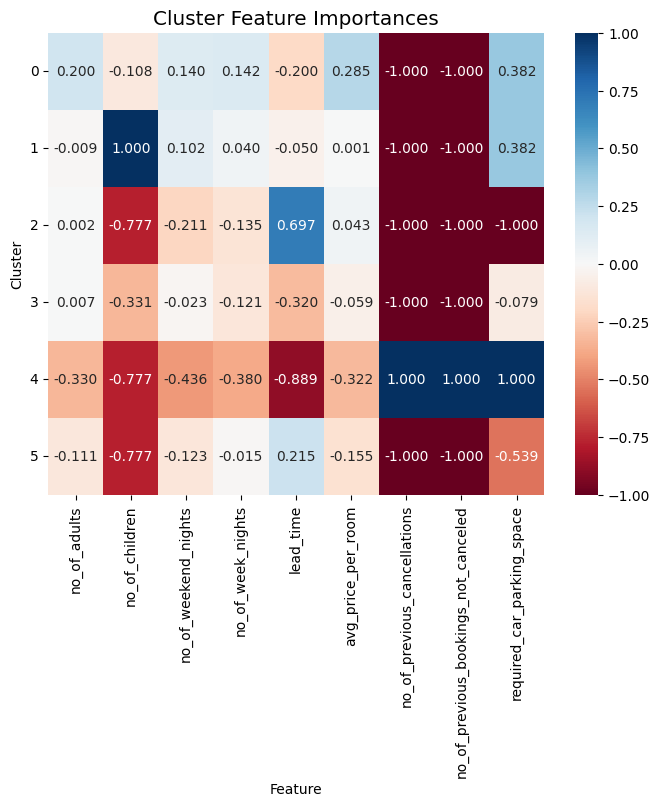

In [78]:
# Feature importances of
feats = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','required_car_parking_space']
overall_means = X[feats].mean()
feat_importances = cluster_means.iloc[:, :9] / overall_means - 1
def set_greater_than_one(x):
    if x > 1: return 1
    else: return x
feat_importances = feat_importances.applymap(set_greater_than_one)
heatmap(feat_importances, 'Cluster Feature Importances', 'Cluster')

In [79]:
feat_importances = feat_importances.rename(columns={'no_of_previous_cancellations': 'no_of_pre_cancel'})
feat_importances = feat_importances.rename(columns={'no_of_previous_bookings_not_canceled': 'no_of_pre_notcancel'})
feat_importances = feat_importances.rename(columns={'required_car_parking_space': 'required_parking'})
feat_importances

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,avg_price_per_room,no_of_pre_cancel,no_of_pre_notcancel,required_parking
cluster,,,,,,,,,
0,0.199865,-0.107779,0.139727,0.142200,-0.199579,0.285239,-1.0,-1.0,0.381839
1,-0.009040,1.000000,0.102153,0.040465,-0.049759,0.000702,-1.0,-1.0,0.381839
2,0.001673,-0.776945,-0.210958,-0.135258,0.697066,0.043076,-1.0,-1.0,-1.000000
3,0.007030,-0.330834,-0.023091,-0.121385,-0.320015,-0.059498,-1.0,-1.0,-0.078774
4,-0.330432,-0.776945,-0.436399,-0.380345,-0.888566,-0.322118,1.0,1.0,1.000000
5,-0.110814,-0.776945,-0.123287,-0.015026,0.214703,-0.154766,-1.0,-1.0,-0.539387


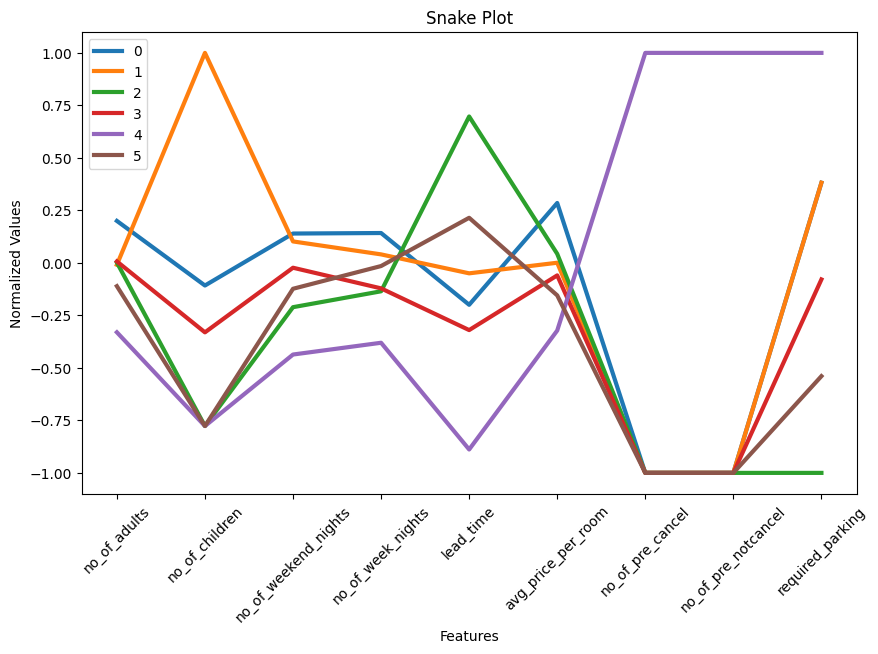

In [80]:
features = list(feat_importances.columns)

# Create snake plot
plt.figure(figsize=(10, 6))
for i in range(len(feat_importances)):
    plt.plot(features, feat_importances.iloc[i], label=feat_importances.index[i], linewidth=3)
plt.legend()
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.title('Snake Plot')
# Set x-axis label angle to 45 degrees
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0.98, 'K-means Visualizations - 6 clusters')

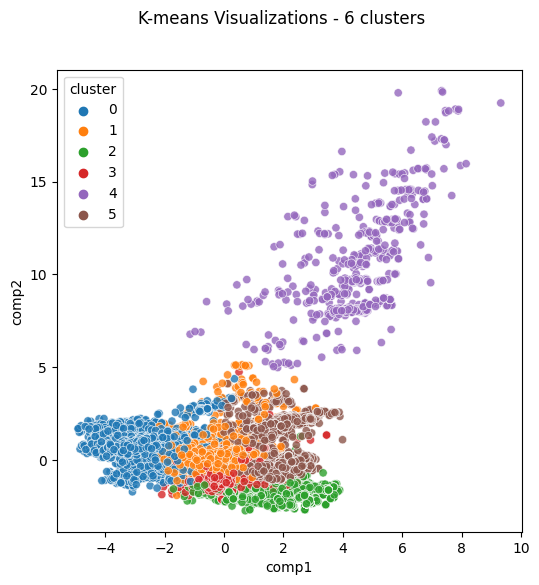

In [81]:
# Define custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
custom_palette = sns.color_palette(colors)

# Set the hue column and color palette
hue_column = 'cluster'
hue_palette = custom_palette

# Visualize clusters
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=X, x='comp1', y='comp2', hue=hue_column, alpha=0.8, palette=hue_palette) # first 2 components
fig.suptitle('K-means Visualizations - 6 clusters')

In [82]:
count_cenceled = pd.concat([X, y], axis = 1)
count_cenceled = count_cenceled.loc[:, ['cluster', 'booking_status']]

cluster_counts = count_cenceled['cluster'].value_counts()
cluster_cencel_counts = count_cenceled.loc[count_cenceled['booking_status'] == 1, 'cluster'].value_counts()
cancel_percent = (cluster_cencel_counts / cluster_counts) * 100
cancel_percent = pd.DataFrame(cancel_percent)
cancel_percent = cancel_percent.reset_index()
cancel_percent = cancel_percent.sort_values(by='index')
cancel_percent



,index,cluster
2,0,54.987740
0,1,52.331924
4,2,59.902465
3,3,51.471861
5,4,1.157025
1,5,42.137431


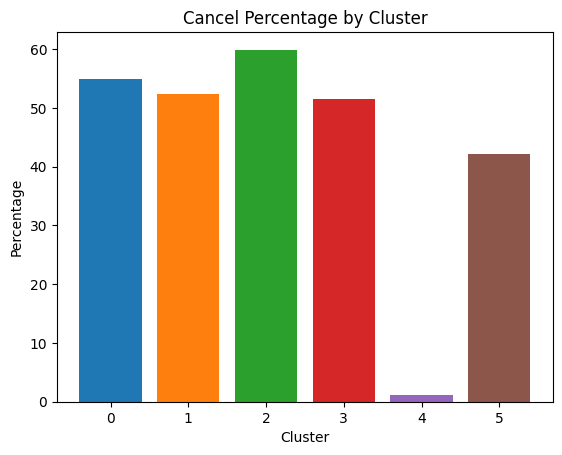

In [83]:
# set color list
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.bar(cancel_percent['index'], cancel_percent['cluster'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Cancel Percentage by Cluster')
plt.show()